In [1]:
from scimath.units.length import meters as m
from scimath.units.length import kilometers as km
from scimath.units.length import light_year as ly
from scimath.units.mass import kilograms as kg
from scimath.units.time import seconds as s
from scimath.units.time import years as yr
from scimath.units.length import astronomical_unit
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from src.constants import G, c, solar_mass, g
from src.utils import v_escape_solar
from src.engine import Engine
from src.starship import Starship
from src.solar_sail import SolarSail
%matplotlib inline

## Inertia Mission Planning

This notebook is for planning mission scenarios discussed in the novel

In [9]:
initial_fuel_mass = 6.6e10 * kg
sail_area_density = 0.00003 * kg / m**2  # Carbon nanotube sheets
sail_radius = 6000 * km
sail_mass = sail_radius**2 * np.pi * sail_area_density
print(f'Sail mass is {sail_mass / kg} kg')
solar_sail = SolarSail(sail_mass, sail_radius, reflectivity=0.98)
eng = {'main': Engine(initial_fuel_mass)}
total_distance = 4.244 * ly
ss = Starship(6.6e10 * kg, eng, solar_sail=solar_sail, destination_distance=total_distance)
ss.wait(10 * yr)
initial_distance_to_sun = 0.01 * astronomical_unit
ti = ss.time
ss.sail(None, 
        time_step=1.0 * s, 
        max_iterations=1e6, 
        initial_distance_to_star=initial_distance_to_sun,
        max_accel=3.0 * g,
        log_freq=1000)
tf = ss.time
distance_after_sail = ss.position
sail_velocity = ss.solar_sail.final_velocity(ss.total_mass() - ss.solar_sail.sail_mass, initial_distance_to_sun)
print(f'Achieved {ss.velocity / sail_velocity * 100}% of the target final velocity of {sail_velocity / c}c.')
# print(f'Sail time is {(tf - ti) / (3600 * 24 * s)} days.')
ss.accelerate(fuel_mass=0.6 * initial_fuel_mass, acceleration=0.0001 * g)
ss.cruise(ss.destination_distance - distance_after_sail)
ss.accelerate(target_velocity=sail_velocity, decelerate=True, acceleration=0.0001 * g)
ss.sail(1.0e-22 * c,
        time_step=1.0*s,
        max_iterations=1e6,
        initial_distance_to_star=distance_after_sail,
        max_accel=3.0 * g,
        log_freq=1000,
        decelerate=True
        )
try:
    ss.accelerate(decelerate=True)
except ValueError:
    ss.accelerate(decelerate=True, fuel_mass=ss.fuel_mass())
ss.wait(10 * yr)
ss.print_history()


Sail mass is 3392920065.8769765 kg
Achieved 91.35006534901825% of the target final velocity of 0.001579942693705075c.


{'time': 0.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 0.0 - Waited: 1.00e+01 years. Distance=0.00e+00 lightyears
{'time': 315576000.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 10.0 - Sailing with velocity 29.43 m/s with acceleration 3.0g.
{'time': 315576001.0*s, 'position': 0.0*m, 'velocity': 29.43*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 10.0 - Sailing with velocity 29459.43000000024 m/s with acceleration 3.0g.
{'time': 315577001.0*s, 'position': 14729715.000000095*m, 'velocity': 29459.43000000024*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 10.0 - Sailing with velocity 58889.43000000053 m/s with acceleration 3.0g.
{'time': 315578001.0*s, 'position': 58889430.0000005*m, 'velocity': 58889.43000000053*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 10.0 - Sailing with velocity 8831

year 2365.9 - Sailing with velocity 473384.0123398944 m/s with acceleration 0.00021307482789683157g.
{'time': 74662108888.44797*s, 'position': 4.023817072555211e+16*m, 'velocity': 473384.0123398944*m*s**-1, 'fuel_mass': 14135745949.74733*kg}

year 2365.9 - Sailing with velocity 473381.9192544683 m/s with acceleration 0.00021364984129869282g.
{'time': 74662109888.44797*s, 'position': 4.023817119893611e+16*m, 'velocity': 473381.9192544683*m*s**-1, 'fuel_mass': 14135745949.74733*kg}

year 2365.9 - Sailing with velocity 473379.82051674114 m/s with acceleration 0.00021422718291970645g.
{'time': 74662110888.44797*s, 'position': 4.023817167231943e+16*m, 'velocity': 473379.82051674114*m*s**-1, 'fuel_mass': 14135745949.74733*kg}

year 2365.9 - Sailing with velocity 473377.71610381 m/s with acceleration 0.0002148068653356495g.
{'time': 74662111888.44797*s, 'position': 4.023817214569543e+16*m, 'velocity': 473377.71610381*m*s**-1, 'fuel_mass': 14135745949.74733*kg}

year 2365.9 - Sailing with velo

<ipython-input-10-1c9e92bbb860>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


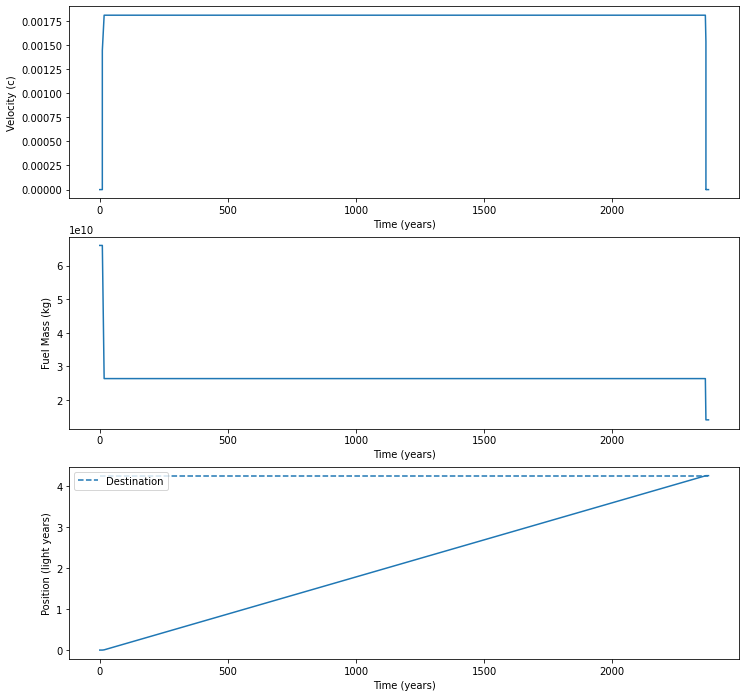

In [10]:
fig = ss.plot_history()
fig.show()

In [4]:
# fig.savefig('../images/proxima_centauri.png')

## Example: Aborted mission

In this mission, the crew decides to abort the mission at the half-way point and return to the destination.

In [5]:
eng = {'main': Engine(1000.0 * kg)}
ss = Starship(1.0 * kg, eng)
ss.wait(10 * yr)
ss.accelerate(fuel_mass = 900 * kg)
ss.cruise(ss.destination_distance / 2)
ss.accelerate(decelerate=True)
ss.accelerate(fuel_mass = ss.fuel_mass(), decelerate=True)
ss.cruise(ss.destination_distance / 2)
ss.wait(10 * yr)
ss.print_history()



{'time': 0.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 1000.0*kg}

year 0.0 - Waited: 1.00e+01 years. Distance=0.00e+00 lightyears
{'time': 315576000.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 1000.0*kg}

year 10.0 - Acceleration: 1.0 g for 9.65e-04 years.  New velocity is 9.96e-04 c.  1.00e+02 kg of fuel remaining.
{'time': 315636899.91823256*s, 'position': 4547916049.942738*m, 'velocity': 298714.09893052676*m*s**-1, 'fuel_mass': 100.0*kg}

year 10.0 - Cruise: 2.13e+03 years to complete. Distance=2.12e+00 lightyears
{'time': 67517419714.55775*s, 'position': 2.007412454791605e+16*m, 'velocity': 298714.09893052676*m*s**-1, 'fuel_mass': 100.0*kg}

year 2139.5 - Acceleration: 1.0 g for 9.65e-04 years.  New velocity is 0.00e+00 c.  5.46e+01 kg of fuel remaining.
{'time': 67517450164.51686*s, 'position': 2.0074129095832096e+16*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 54.57271364317841*kg}

year 2139.5 - Acceleration: 1.0 g for 1.10e-03 years.  New velo

<ipython-input-6-1c9e92bbb860>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


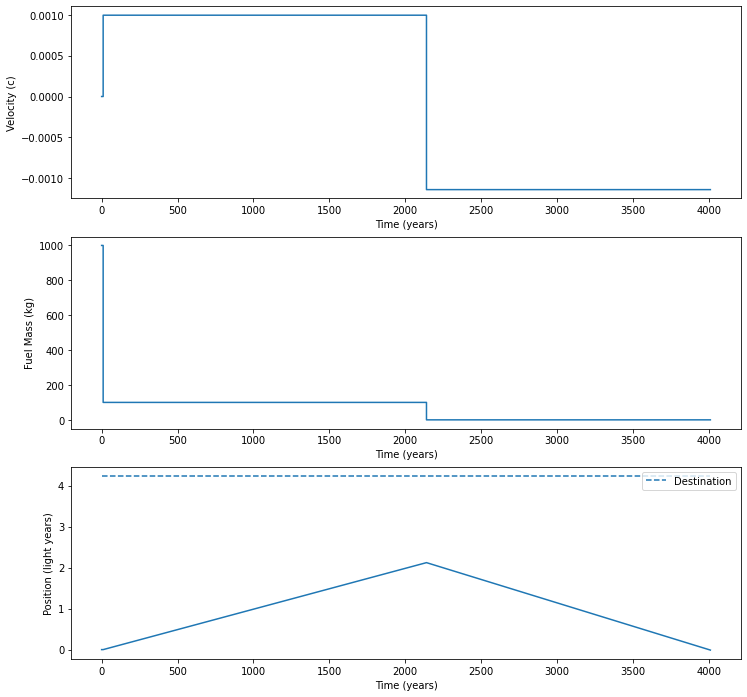

In [6]:
fig = ss.plot_history()
fig.show()

In [7]:
# fig.savefig('../images/proxima_centauri_aborted.png')

# Example: Solar Sail And Rocket Mission

In [8]:
eng = {'main': Engine(1000.0 * kg)}
solar_sail = SolarSail(0.1 * kg, 1000.0 * m)
ss = Starship(1.0 * kg, eng, solar_sail=solar_sail, destination_distance=0.01 * ly)
ss.sail(None)
# ss.accelerate(fuel_mass = 900 * kg)
ss.cruise(ss.destination_distance - ss.position)
ss.accelerate(decelerate=True)
ss.wait(10 * yr)
ss.print_history()



{'time': 0.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 1000.0*kg}

year 0.0 - Sailing with velocity 1.6028259640682596 m/s.
{'time': 60.0*s, 'position': 0.0*m, 'velocity': 1.6028259640682596*m*s**-1, 'fuel_mass': 1000.0*kg}

year 0.0 - Sailing with velocity 15697.97534493167 m/s.
{'time': 600060.0*s, 'position': 4758608298.252776*m, 'velocity': 15697.97534493167*m*s**-1, 'fuel_mass': 1000.0*kg}

year 0.0 - Sailing with velocity 29644.840098827957 m/s.
{'time': 1200060.0*s, 'position': 18479886473.312996*m, 'velocity': 29644.840098827957*m*s**-1, 'fuel_mass': 1000.0*kg}

year 0.1 - Sailing with velocity 40984.650793040964 m/s.
{'time': 1800060.0*s, 'position': 39803863500.15242*m, 'velocity': 40984.650793040964*m*s**-1, 'fuel_mass': 1000.0*kg}

year 0.1 - Sailing with velocity 49760.42242653652 m/s.
{'time': 2400060.0*s, 'position': 67145437532.66727*m, 'velocity': 49760.42242653652*m*s**-1, 'fuel_mass': 1000.0*kg}

year 0.1 - Sailing with velocity 56434.182966518245

<ipython-input-9-1c9e92bbb860>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


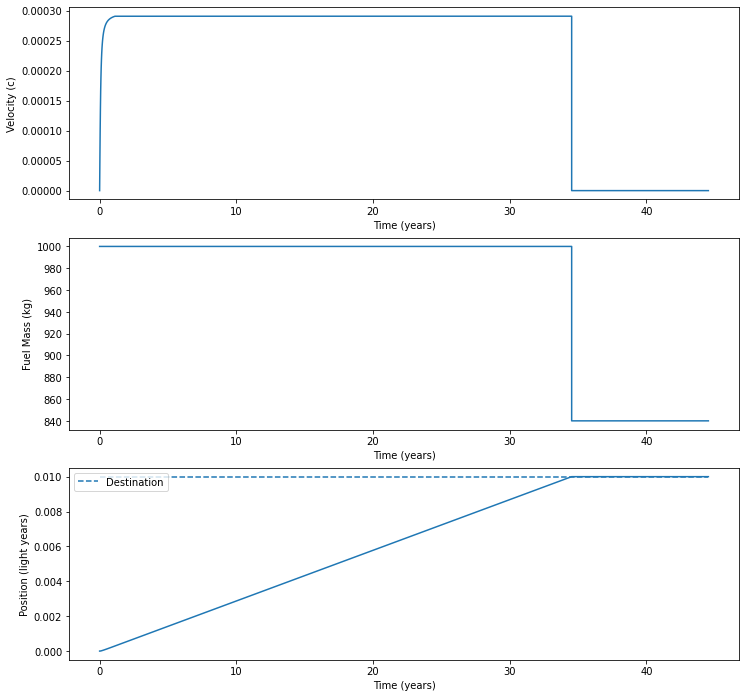

In [9]:
fig = ss.plot_history()
fig.show()